**Climate Change and it's effects since 1981**

Francisco Soltero

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re

pd.options.mode.copy_on_write = True
np.random.seed(1)

In [9]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
'Copy of Lab02.ipynb'      'Copy of Lab05.ipynb'   'Copy of P2.ipynb'   FinalProject.ipynb
'Copy of Lab03.ipynb'      'Copy of Lab06.ipynb'    data/               Lab01.ipynb
'Copy of Lab04.ipynb'      'Copy of P1.ipynb'       Demo-01.ipynb       NORMAL_DLY_sample_csv.csv
'Copy of Lab05 (1).ipynb'  'Copy of P2 (1).ipynb'   FinalProject.html   normal_dly.zip


In [11]:
%%shell
jupyter nbconvert FinalProject.ipynb --to html

[NbConvertApp] Converting notebook FinalProject.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 335064 bytes to FinalProject.html


In [10]:
# This is a sample data set as I have to wait for them to respond to send me the full data set
climate_change_sample_df = pd.read_csv('NORMAL_DLY_sample_csv.csv')
climate_change_sample_df['DLY-TMAX-NORMAL'] = climate_change_sample_df['DLY-TMAX-NORMAL'] / 10
climate_change_sample_df['DLY-TMIN-NORMAL'] = climate_change_sample_df['DLY-TMIN-NORMAL'] / 10
climate_change_sample_df['MTD-PRCP-NORMAL'] = climate_change_sample_df['MTD-PRCP-NORMAL'] / 10
climate_change_sample_df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,MTD-PRCP-NORMAL
0,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100101,-3.3,14.5,0.2
1,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100102,-3.5,14.4,0.4
2,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100103,-3.6,14.3,0.5
3,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100104,-3.8,14.2,0.7
4,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20100105,-3.9,14.1,0.9
...,...,...,...,...,...,...,...,...,...
360,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101227,-2.3,15.4,6.4
361,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101228,-2.5,15.2,6.7
362,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101229,-2.7,15.0,6.9
363,GHCND:USC00327027,PETERSBURG 2 N ND US,466.3,48.0355,-98.01,20101230,-2.9,14.8,7.1


**Project Goals**

The goal of this project is to further investigate climate change and its affects over time on the weather and environment we currently live in. The question I want to answer: Is climate change really as bad as everyone says or is it exageratted. My hypothesis is that climate change is actually much worse than what we currently see it described as in the media and by the government. This data set will include all the different percipitation increases over every year from 1981 - 2010 and includes the station name, location, Elevation, latitude, date, the temperature min and max, and the normal percipitation.

**Website**

https://frankiesoltero.github.io/DataScienceProject/FinalProject

The Average Minimum Daily Tempertaure: 28.203561643835613 Degrees Fairenheit
The Average Maximum Daily Tempertaure: 49.3186301369863 Degrees Fairenheit
The Average Daily Precipation: 8.75917808219178 percent


Text(0.5, 1.0, 'The Daily Min Temperature - 2010')

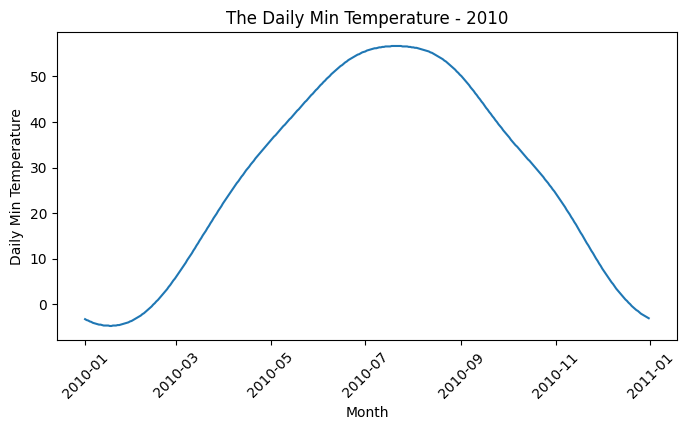

In [ ]:
average_daily_temp_min = climate_change_sample_df['DLY-TMIN-NORMAL'].mean()
print(f"The Average Minimum Daily Tempertaure: {average_daily_temp_min} Degrees Fairenheit")
average_temp_max = climate_change_sample_df['DLY-TMAX-NORMAL'].mean()
print(f"The Average Maximum Daily Tempertaure: {average_temp_max} Degrees Fairenheit")
avg_percip = climate_change_sample_df['MTD-PRCP-NORMAL'].mean()
print(f"The Average Daily Precipation: {avg_percip} percent")
climate_change_sample_df["DATE"] = pd.to_datetime(climate_change_sample_df['DATE'].astype(str), format='%Y%m%d')
climate_change_sample_df.set_index('DATE', inplace=True)
fix, ax = plt.subplots(figsize=(8,4))
ax.plot(climate_change_sample_df.index, climate_change_sample_df['DLY-TMIN-NORMAL'])
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Daily Min Temperature')
plt.title('The Daily Min Temperature - 2010')